<a href="https://colab.research.google.com/github/amedekaemperor/PyTorch/blob/main/dl_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [49]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
X = df.drop('species', axis=1).values
y = df['species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [51]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [52]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

![](https://raw.githubusercontent.com/damiannolan/iris-neural-network/14a9df14a57ab9d350b7bc92b2903fa1f25c4f1c//img/iris_model.png)

In [53]:
class Model(nn.Module):
    def __init__(self, input_layers=4, hidden_layer1=5, hidden_layer2=3, output_layer=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_layers, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_layer)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [64]:
torch.manual_seed(41)
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (out): Linear(in_features=3, out_features=3, bias=True)
)

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [56]:
epochs = 200
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.090828776359558
Epoch: 10 Loss: 0.9027032256126404
Epoch: 20 Loss: 0.6753799915313721
Epoch: 30 Loss: 0.5161949992179871
Epoch: 40 Loss: 0.4181417226791382
Epoch: 50 Loss: 0.3454269766807556
Epoch: 60 Loss: 0.2778512239456177
Epoch: 70 Loss: 0.21447458863258362
Epoch: 80 Loss: 0.16106079518795013
Epoch: 90 Loss: 0.12146110087633133
Epoch: 100 Loss: 0.09476064145565033
Epoch: 110 Loss: 0.07730760425329208
Epoch: 120 Loss: 0.06562148034572601
Epoch: 130 Loss: 0.05744348466396332
Epoch: 140 Loss: 0.05145443603396416
Epoch: 150 Loss: 0.046881772577762604
Epoch: 160 Loss: 0.04326315596699715
Epoch: 170 Loss: 0.04031408950686455
Epoch: 180 Loss: 0.03785319998860359
Epoch: 190 Loss: 0.03576033189892769


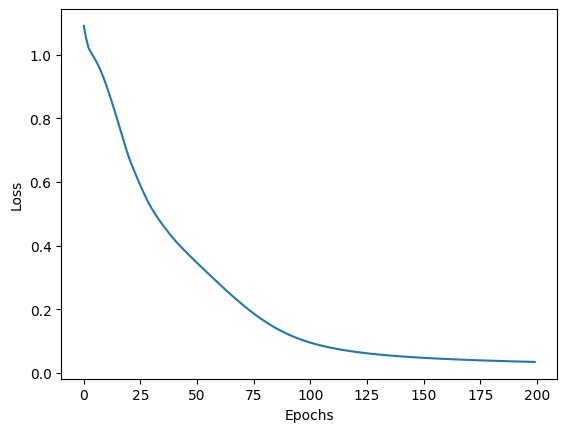

In [57]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss');

In [58]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

loss

tensor(0.1352)

In [59]:
new_data = torch.FloatTensor([[5.1, 3.5, 1.4, 0.2]])
with torch.no_grad():
    y_eval = model.forward(new_data)
    print(encoder.classes_[y_eval.argmax().item()])

setosa
